<a href="https://colab.research.google.com/github/Manish-k723/United-Airlines/blob/main/Inflight_Survey_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/united.zip','r') as zip_ref:
  zip_ref.extractall('/content')

In [57]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [41]:
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}
sns.set(rc = rc)

palette_color = sns.color_palette('dark')
palette1 = ['dimgrey','crimson']
palette2 = ['crimson', 'dimgrey']
palette3 = ['darkgreen', 'orange']
palette4 = ['salmon','mediumseagreen']
palette5 = ['mediumseagreen','salmon']
palette6 = sns.color_palette("YlOrBr")

pd.options.display.max_columns = 50

## **Importing Data**

In [4]:
survey_df = pd.read_csv("/content/Datasets/Survey data_Inflight Satisfaction Score.csv", parse_dates = ['scheduled_departure_date'])

In [5]:
print("Shape of Survey data_Inflight Satisfaction Score data is", survey_df.shape)

Shape of Inflight Service_Inventory data is (61267, 9)
Shape of Inflight Service_Pre order data is (212039, 13)
Shape of Survey data _Customer comments data is (9424, 14)
Shape of Survey data_Inflight Satisfaction Score data is (47074, 31)


In [6]:
survey_df.sample(3)

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,arrival_delay_minutes,arrival_delay_group,cabin_code_desc,cabin_name,entity,number_of_legs,seat_factor_band,loyalty_program_level,generation,fleet_type_description,fleet_usage,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
21371,2661,EWX,DEX,PNXXNQ,2022-09-14,What item did you choose?,other (specify),NaN,food & beverage,comp,23,Delayed,Business,NaN,Domestic,1,90+,non-elite,Boomer,B737-900,Mainline,37K,UA,1605,Medium,C94,B29,Domestic,member,THALES,hub departure
39427,250,TFX,EWX,O0XXYN,2022-09-25,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,23,Delayed,Business,NaN,Atlantic,1,90+,premier silver,Gen X,B757-200,Mainline,75B,UA,3344,Long,C40,C133,International,member,PANASONIC,spoke departure
45314,1722,SFX,KOX,ITXXY8,2022-09-29,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,-10,Early & Ontime,Economy,Economy Plus,Domestic,1,90+,premier gold,Gen X,B737-900,Mainline,37K,UA,2370,Medium,F16,2,Domestic,member,THALES,hub departure


In [7]:
survey_df.duplicated().sum()

0

In [8]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47074 entries, 0 to 47073
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   flight_number                     47074 non-null  int64         
 1   origin_station_code               47074 non-null  object        
 2   destination_station_code          47074 non-null  object        
 3   record_locator                    47074 non-null  object        
 4   scheduled_departure_date          47074 non-null  datetime64[ns]
 5   question_text                     47074 non-null  object        
 6   score                             47074 non-null  object        
 7   satisfaction_type                 34963 non-null  object        
 8   driver_sub_group1                 47074 non-null  object        
 9   driver_sub_group2                 47074 non-null  object        
 10  arrival_delay_minutes             47074 non-nu

# Data Cleaning

In [9]:
survey_df.question_text.value_counts() # What questions were ask?

How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?    34963
What item did you choose?                                                                       12111
Name: question_text, dtype: int64

In [10]:
survey_df.groupby(['score','satisfaction_type']).size()

score  satisfaction_type
1      Dissatisfied         7713
2      Dissatisfied         8250
3      Dissatisfied         6390
4      Satisfied            5877
5      Satisfied            6733
dtype: int64

In [11]:
survey_df['customer_choice'] = np.where(survey_df.question_text == 'What item did you choose?', survey_df.score, None)
#We have 2 questions answer in single column which will make harder to analyse one column at a time, so seprating these columns

In [12]:
survey_df['score'] = np.where(survey_df.question_text == 'What item did you choose?', None, survey_df.score)

survey_df['score'] = survey_df['score'].astype('Int64')

We have some columns which are categorical but stored as Object, let's convert their them to categorical type and also put numbers into them.

In [13]:
encode_cols = ['satisfaction_type', 'generation', 'arrival_delay_group', 'cabin_name', 'entity', 'international_domestic_indicator', 'response_group']

In [48]:
encoder = LabelEncoder()
label_info = []
for col in encode_cols:
  survey_df['num_'+col] = encoder.fit_transform(survey_df[col])
  labels = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
  label_info.append([col, labels])
  print(labels)

{'Dissatisfied': 0, 'Satisfied': 1, nan: 2}
{'Boomer': 0, 'Gen X': 1, 'Gen Z': 2, 'Greatest': 3, 'Millennial': 4, 'NBK': 5, 'Silent': 6}
{'Delayed': 0, 'Early & Ontime': 1}
{'Economy': 0, 'Economy Plus': 1, nan: 2}
{'Atlantic': 0, 'Domestic': 1, 'Latin': 2, 'Pacific': 3, nan: 4}
{'Domestic': 0, 'International': 1}
{'NBK': 0, 'member': 1, 'non-member': 2}


Making buckets for `arrival_delay_minutes`

In [15]:
# bucket_labels = ['-n_to_0', '0_to_50', '50_to_p'] #Creating buckets
# bins = [-float('inf'), 0, 50, float('inf')]
# survey_df['Delay_Bucket'] = pd.cut(survey_df['arrival_delay_minutes'], bins=bins, labels=bucket_labels)

In [67]:
survey_df['loyalty_program_level'].fillna("No Program", inplace = True)

# **Analysis**

Text(0.5, 1.0, 'Satisfied Vs Dissatisfied Customers Ratio')

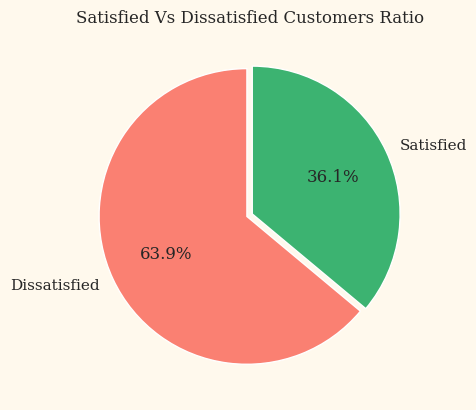

In [77]:
plt.pie(survey_df.satisfaction_type.value_counts(), labels = ["Dissatisfied", "Satisfied"], colors = palette4, autopct = '%1.1f%%', explode = [0.02, 0.02], startangle = 90)
plt.title("Satisfied Vs Dissatisfied Customers Ratio")

<ipython-input-18-cee2cb3da9d9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = survey_df.corr()


<Axes: >

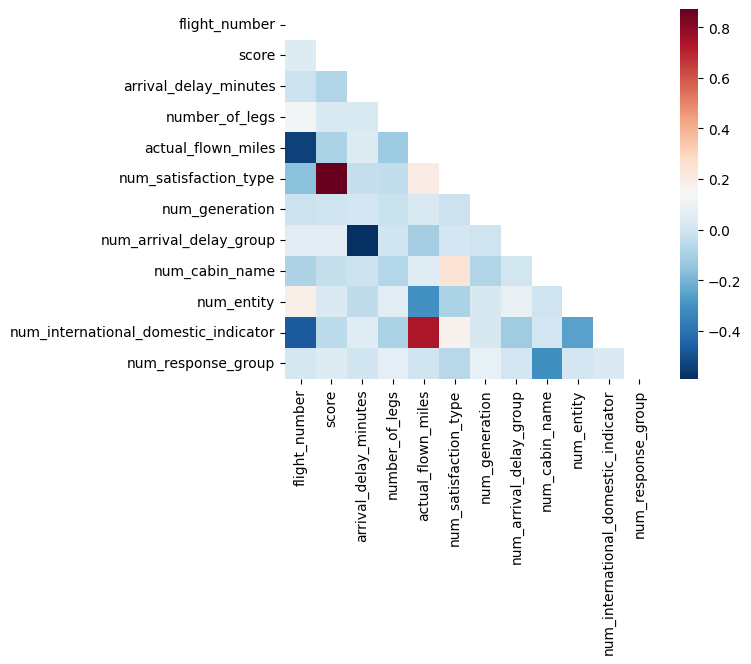

In [18]:
corr_mat = survey_df.corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
sns.heatmap(corr_mat, square = True, cmap = plt.cm.RdBu_r, mask = mask)

In [91]:
fig = px.histogram(survey_df, x='arrival_delay_group', color='satisfaction_type', facet_col='number_of_legs',
                   title='Satisfaction Scores by Delay and Number of Legs')
fig.update_layout(height=400, width=1200)

<Figure size 800x800 with 0 Axes>

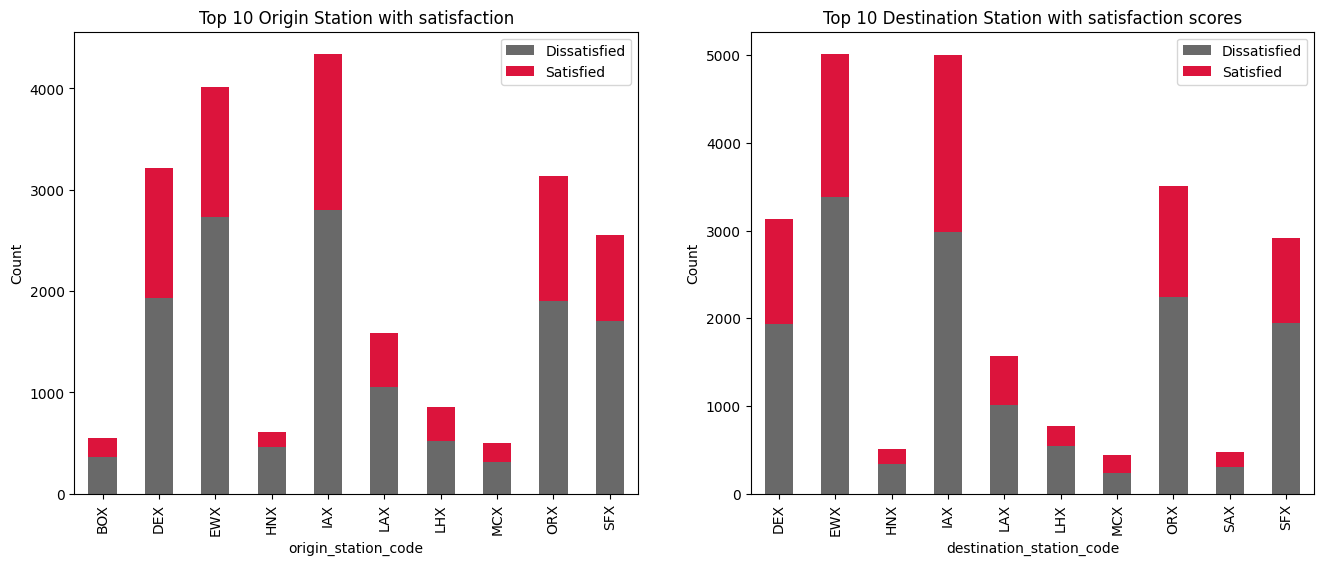

In [21]:
plt.figure(figsize = (8, 8))
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plt.sca(axes[0])
temp = survey_df['origin_station_code'].value_counts().head(10)
temp_df = survey_df[survey_df['origin_station_code'].isin(temp.index)]
# sns.countplot(data = temp_df, x = 'origin_station_code', hue = 'satisfaction_type', palette = palette1, ax = axes[0])
satisf_counts = temp_df.groupby('origin_station_code')['satisfaction_type'].value_counts().unstack(fill_value=0)
# machine_failure_counts['Total'] = machine_failure_counts.sum(axis=1)
# sorted_machine_failure_counts = machine_failure_counts.sort_values(by='Total', ascending=False)
# cumulative_percentage = (sorted_machine_failure_counts['Total'] / sorted_machine_failure_counts['Total'].sum()).cumsum()

# sns.barplot(x=sorted_machine_failure_counts.index, y=sorted_machine_failure_counts['Total'], ax=axes[0])
# plt.bar(stations - bar_width/2, station_data['Dissatisfied'], bar_width, label='Dissatisfied', color='red')
satisf_counts.plot(kind='bar', stacked=True, color=palette1, ax = axes[0])

plt.ylabel("Count")
plt.title("Top 10 Origin Station with satisfaction")
plt.legend()

plt.sca(axes[1])
temp = survey_df['destination_station_code'].value_counts().head(10)
temp_df = survey_df[survey_df['destination_station_code'].isin(temp.index)]
# sns.countplot(data = temp_df, x = 'Product ID', hue = 'Machine failure', palette = palette1)
satisf_counts = temp_df.groupby('destination_station_code')['satisfaction_type'].value_counts().unstack(fill_value=0)
satisf_counts.plot(kind='bar', stacked=True, color=palette1, ax = axes[1])
plt.ylabel("Count")
plt.title("Top 10 Destination Station with satisfaction scores")
plt.legend()

(array([19236., 19240., 19244., 19248., 19252., 19256., 19260., 19264.,
        19266.]),
 [Text(19236.0, 0, '2022-09-01'),
  Text(19240.0, 0, '2022-09-05'),
  Text(19244.0, 0, '2022-09-09'),
  Text(19248.0, 0, '2022-09-13'),
  Text(19252.0, 0, '2022-09-17'),
  Text(19256.0, 0, '2022-09-21'),
  Text(19260.0, 0, '2022-09-25'),
  Text(19264.0, 0, '2022-09-29'),
  Text(19266.0, 0, '2022-10-01')])

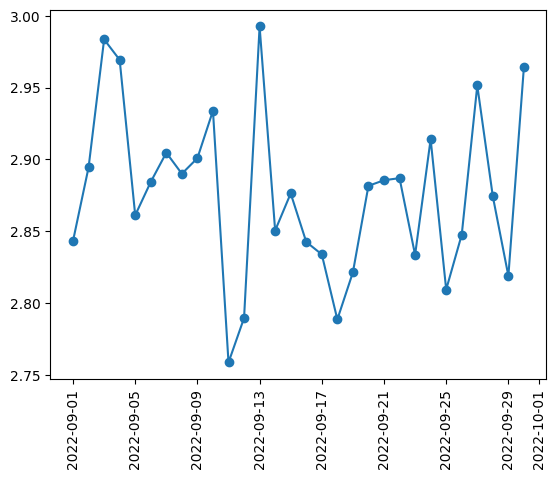

In [22]:
customer_data = survey_df[['scheduled_departure_date', 'score']].copy()
# customer_data.fillna(0, inplace = True)
# customer_data['month'] = customer_data['scheduled_departure_date'].dt.month
average_satisfaction_date = customer_data.groupby('scheduled_departure_date')['score'].mean()
plt.plot(average_satisfaction_date.index, average_satisfaction_date.values, marker='o', linestyle='-')
plt.xticks(rotation = 90)

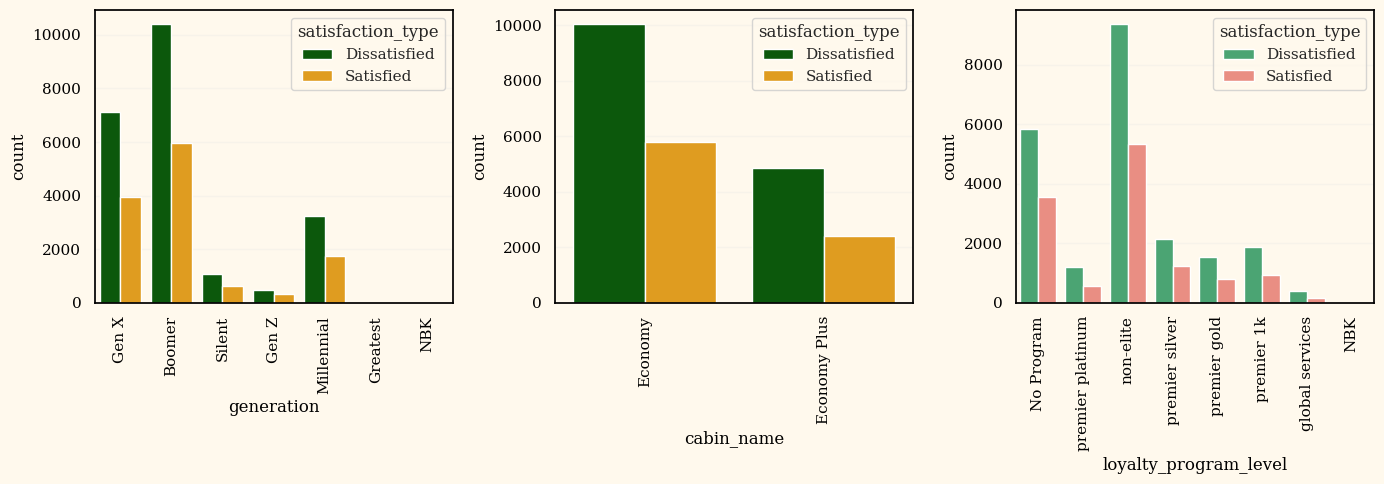

In [69]:
# plt.figure()
fig, axes = plt.subplots(1, 3, figsize = (14, 5))
sns.countplot(data = survey_df, hue = 'satisfaction_type', x = 'generation', ax = axes[0], palette = palette3)
axes[0].tick_params(axis='x', rotation=90)
sns.countplot(data = survey_df, hue = 'satisfaction_type', x = 'cabin_name', ax = axes[1], palette = palette3)
axes[1].tick_params(axis='x', rotation=90)
sns.countplot(data = survey_df, x = 'loyalty_program_level', hue = 'satisfaction_type', palette = palette3, ax = axes[2])
axes[2].tick_params(axis='x', rotation=90)
plt.subplots_adjust(wspace = 0.5)
plt.tight_layout()
# plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='fleet_usage', ylabel='count'>

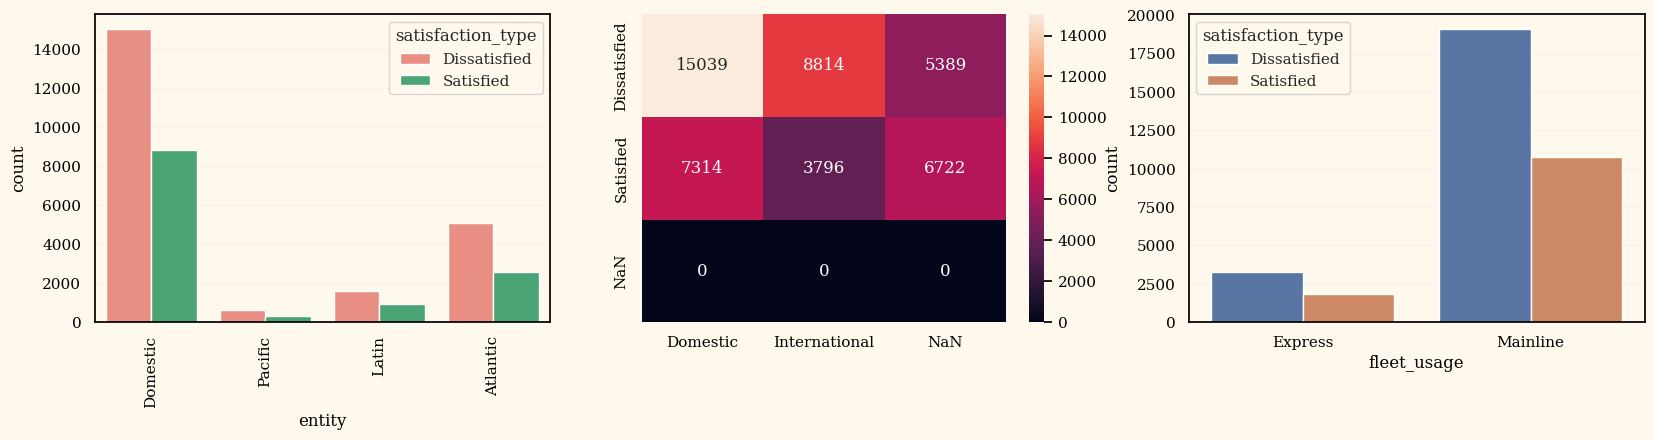

In [99]:
fig, axes = plt.subplots(1,3, figsize = (20, 4))
sns.countplot(data = survey_df, hue = 'satisfaction_type', x = 'entity', ax = axes[0], palette = palette4)
axes[0].tick_params(axis='x', rotation=90)

confusion_mat = confusion_matrix(survey_df['num_international_domestic_indicator'], survey_df['num_satisfaction_type'])
sns.heatmap(confusion_mat, annot = True, fmt = 'd', xticklabels=['Domestic', 'International', 'NaN'],
            yticklabels=['Dissatisfied', 'Satisfied', 'NaN'], ax = axes[1])

# sns.boxplot(survey_df, x = 'satisfaction_type', y = 'actual_flown_miles', ax = axes[2])
sns.countplot(survey_df, x = 'fleet_usage', hue = 'satisfaction_type', ax = axes[2])

In [155]:
flight_counts = survey_df['flight_number'].value_counts()
filtered_flights = flight_counts[flight_counts >= 30].index
filtered_df = survey_df[survey_df['flight_number'].isin(filtered_flights)]
flight_scores = filtered_df.groupby('flight_number')['score'].mean().reset_index()
flight_scores.nlargest(10, 'score')

,flight_number,score
197,952,3.857143
220,980,3.568627
66,128,3.545455
244,1174,3.535714
278,1756,3.5
247,1194,3.461538
154,873,3.44186
216,974,3.434783
261,1511,3.392857
103,315,3.380952
